In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
import IPython.display as display
import PIL.Image as Image
import os, io
import PIL
import gcsfs
import random
from matplotlib.colors import LogNorm
import pandas as pd
from scipy import fftpack
from tqdm import tqdm
from skimage.util import random_noise
import skimage.io
import skimage.filters
import cv2
from cv2 import GaussianBlur
import numpy as np
from fourier_noise_transfer import *

def read_image(uri): 
    
    with gcsfs.GCSFileSystem().open(uri, "rb") as f:
         byte = f.read()
            
    pil_img = Image.open(io.BytesIO(byte)).convert('L')

    return (pil_img)



def plot_results(clear):
    num = 3
    fig = plt.figure(figsize=(15,20))
    rows = 2
    columns = 3
    
    fig.add_subplot(rows, columns, 1)
    plt.imshow(clear,plt.cm.gray)
    plt.axis('off')
    plt.title("Original Test")


def write_image(uri, img):
    
    
    with gcsfs.GCSFileSystem().open(uri, "wb") as f:
    
        img.save(f,"JPEG")


In [2]:
contents_target = gcsfs.GCSFileSystem().ls("gs://marco-aspromonte-denoising/data/sample/images/crops")
X_test = img_from_uri(contents_target) #Import test samples 
pd_query = pd.read_gbq("SELECT * FROM formazione-marco-aspromonte.denoising.platesmania_dataset limit 10")
contents = pd_query.crop_image_path
y_test = img_from_uri(contents)

NameError: name 'img_from_uri' is not defined

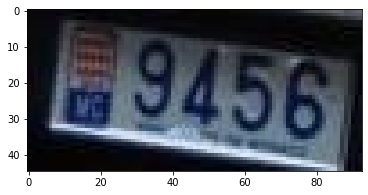

In [38]:
plt.imshow(y_test[4])

In [8]:
n = 2

In [9]:
img_perturbed = noise_transfer_single_img(y_test[n],X_test[n])

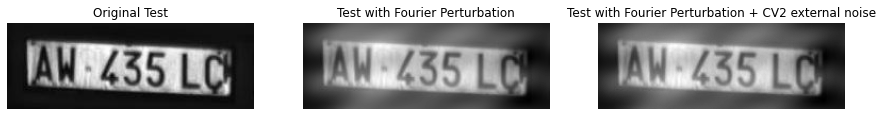

In [10]:
plot_results(X_test[n], img_perturbed)

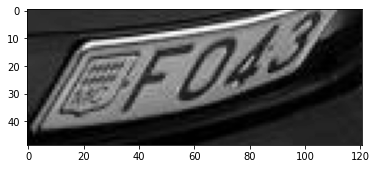

In [19]:
plt.imshow(y_test[2],plt.cm.gray)

CHECK PERTURBATION RESULTS COMPUTED IN 'fourier_perturbation_script.py'

In [40]:
import gcsfs
from tqdm import tqdm

def gcs_ls(uri):
    return ['gs://' + content for content in gcsfs.GCSFileSystem().ls(uri)]

imgs = []
gcs_source_folder = "gs://marco-aspromonte-denoising/tmp/baseline/platesmania_noised"

uris_target = gcs_ls(gcs_source_folder) 


for idx, uri in enumerate(uris_target): 
    
    if idx == 2400:
        break
    imgs.append(read_image(uri))

In [41]:
len(imgs)

2400

In [42]:
gcs_output_folder = "gs://marco-aspromonte-denoising/tmp/baseline/platesmania_noised_sub"


for idx, img in enumerate(imgs): 
    img_name = uris_target[idx].split('/')[-1]     
    print(img_name)
    uri_destination_perturbed = os.path.join(gcs_output_folder, img_name)
    
    write_image(uri_destination_perturbed,img)

0002cf4f-7159-46d5-867c-303d69d3e9f8.jpg
0004034e-c109-4011-b767-44654cc456af.jpg
0009556f-90f4-4ea2-82d5-25aff5f7a86a.jpg
000a047b-dbac-42c2-8dcc-184080382c5c.jpg
000a0b61-1ac9-40fd-b951-ae23e74ce2b6.jpg
000c2fe2-7d60-4cf0-8bbe-f1741ef8efef.jpg
000d386c-80dc-4598-a67e-1df56acc2eed.jpg
000d3f68-6e44-4bd8-b0cf-0d3f0e2347fc.jpg
000dbf02-bcbb-48ac-9bda-c951a4e2dce7.jpg
001096bb-0931-4a20-a7ea-3ae89ef32c86.jpg
0011e67d-4f53-4223-b4a0-1bc4c474ddca.jpg
00135fd7-f450-4da7-904c-3bb23d474b69.jpg
001383aa-f3b4-4784-a6ff-5b2ac9058740.jpg
0016877a-2049-4c4c-bfb1-d5a0f84dc01a.jpg
0016c810-e49c-4d5a-aa87-3770b9c30345.jpg
0018f39d-b147-481c-974a-9b59571429ff.jpg
00198d79-3fb3-40c4-b1f0-fc819e21f586.jpg
001a40f9-7e26-4023-958d-655069dd02bd.jpg
001d0be0-3546-40e6-bcde-47cdb341ad8f.jpg
00204d4a-aca8-47c2-8f0a-55850d9a9e7e.jpg
0021150a-70b9-47cb-b9d0-3b0dcc105258.jpg
0022bb3d-be23-4e63-b3ef-8bf02dc40ff5.jpg
00266f06-17a4-4618-8833-29903b25f5d2.jpg
002a2afc-11f6-413a-b5c2-215229379d3e.jpg
002e98f1-2849-46